## 1 Logistic and Softmax regression

### 1.1 Derivation of gradient for Logistic Regression
We want to show that the gradient of the logistic regression cost function is given by:
$-\frac{\partial E^n (w)}{\partial w_j} = (t^n - y^n)x_j^n$

We have 
$$
\begin{aligned}
-E^n (w)    &= t^n \ln(y^n) + (1-t^n) \ln(1-y^n) -\frac{\partial E^n (w)}{\partial w_j}\\
-\frac{\partial E^n (w)}{\partial w_kj}            &= \frac{t^n}{y^n} \frac{\partial y^n}{\partial w_j} - \frac{1-t^n}{1-y^n}\frac{\partial (y^n)}{\partial w_j}\\
            &= (\frac{t^n}{g_w^n} - \frac{1-t^n}{1-g_w^n})\frac{\partial (g_w^n)}{\partial w_j}\\
            &= (\frac{t^n(1-g_w^n)-(1-t^n)(g_w^n)}{g_w^n(1-g_w^n)})x_j^ng_w^n(1-g_w^n)\\
            &= (t^n-y^n)x_j^n
\end{aligned}
$$


### 1.2 Derivation of gradient for Softmax Regression
We want to show that the gradient of the logistic regression cost function is given by:
$-\frac{\partial E^n (w)}{\partial w_{kj}} = x_j^n(t^n - y^n)$
We have 
        $$
        \begin{aligned}
             -E^n (w)                                &= \sum^C_{k=1} t^n_k \ln(y^n_k) \\
             -\frac{\partial E^n (w)}{\partial w_{kj}}  &= \sum^C_{k=1} \frac{t^n_k}{y^n_j} \frac{\partial y_k^n}{w_j} \\
        \end{aligned}
        $$
We first find 
        $$
        \begin{aligned}
            \frac{\partial y_k^n}{w_j} &= \frac{\partial \frac{e^{w^T_k x^n}}{\sum_{k'}e^{w^T_{k'} x^n}}}{\partial w_j}\\
                                       &= \frac{h' \cdot g - h \cdot g'}{g^2}, \quad h = e^{w^T_k x^n}, \quad g = \sum_{k'}e^{w^T_{k'} x^n}
        \end{aligned}
        $$
Here we must solve the derivate for when $k=j$ and $k\neq j$ seperately since $h=0$ when $k\neq j$, but $g\neq 0$ for any k.   
$k=j:$   
$$
\begin{aligned}
\frac{\partial y_k^n}{w_j} &= \frac{(e^{w^T_k x^n} \cdot \sum_{k'}e^{w^T_{k'} x^n} - e^{w^T_j x^n} \cdot e^{w^T_k x^n})x_j^n}{(\sum_{k'}e^{w^T_{k'} x^n})^2} \\
                           &= \frac{e^{w^T_k x^n}}{\sum_{k'}e^{w^T_{k'} x^n}} \cdot \frac{\sum_{k'}e^{w^T_{k'} x^n} - e^{w^T_j x^n}}{\sum_{k'}e^{w^T_{k'} x^n}}x^n_j \\
                           &= y^n_k(1-y^n_k)x^n_j
\end{aligned}
$$

$k\neq j:$   
$$
\begin{aligned}
\frac{\partial y_k^n}{w_j} &= \frac{0 - e^{w^T_j x^n} \cdot e^{w^T_k x^n}x_j^n}{(\sum_{k'}e^{w^T_{k'} x^n})^2} \\
                           &= -y^n_k y^n_j x^n_j
\end{aligned}
$$

Now we can insert and combine to get the gradient:

$$
\begin{aligned}
-\frac{\partial E^n (w)}{\partial w_{kj}}  &= \sum^C_{k=1} \frac{t^n_k}{y^n_j} \frac{\partial y_k^n}{w_j} \\
         &= x^n_j(-t^n_k(1-y^n_k) - \sum^C_{k\neq j} \frac{t^n_k}{y^n_j} (-y^n_k y^n_j)) \\
         &= x^n_j(-t^n_k + t^n_k y^n_k + \sum^C_{k\neq j} t^n_k y^n_k)\\
         &= x^n_j(y^n_k\sum^C_k t^n_k - t^n_k)\\
         &= x^n_j(y^n_k - t^n_k) \quad \text{using} \sum^C_k t^n_k = 1
\end{aligned}
$$



## 2 Logistic Regression through gradient descent
### 2.1 Code and plots for logistic regression through gradient descent

#### Imports

In [866]:
import mnist
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output

#### Parameters and variables

In [867]:
#Size parameters
training_size = 20000
validation_size = 2000
testing_size = 2000

#Loading sets from mnist files
#mnist.init()
X_train, Y_train, X_test, Y_test = mnist.load()

#Normalizing the sets
X_train = X_train / 255
X_test  = X_test / 255

#Bias Trick
X_train = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)
X_test  = np.concatenate((X_test,np.ones([X_test.shape[0], 1])), axis=1)

#Setting validation/training/testing sets
X_val = X_train[training_size+1:training_size+validation_size+1,:]
Y_val = Y_train[training_size+1:training_size+validation_size+1]

X_train = X_train[0:training_size,:]
Y_train = Y_train[0:training_size]

X_test = X_test[-testing_size:]
Y_test = Y_test[-testing_size:]

#Extracting only 2s and 3s
X_train = X_train[(Y_train == 2) | (Y_train == 3)]
Y_train = Y_train[(Y_train == 2) | (Y_train == 3)]
X_test  = X_test[(Y_test == 2) | (Y_test == 3)]
Y_test  = Y_test[(Y_test == 2) | (Y_test == 3)]
X_val = X_val[(Y_val == 2) | (Y_val == 3)]
Y_val = Y_val[(Y_val == 2) | (Y_val == 3)]


#Setting 2s as 1 and 3s as 0
Y_train[Y_train == 2] = 1
Y_train[Y_train == 3] = 0
Y_test[Y_test == 2]   = 1
Y_test[Y_test == 3]   = 0
Y_val[Y_val == 2]   = 1
Y_val[Y_val == 3]   = 0


#Hypervariables
epochs = 100
batch_size = 40
initial_learning_rate = 0.0001
learning_rate = initial_learning_rate
T = 1000

batches_per_epoch = X_train.shape[0] // batch_size
check_step = batches_per_epoch // 10

#L2 Regularization
lambda_1 = 0.01
lambda_2 = 0.001
lambda_3 = 0.0001

#Variables to track loss
training_loss = []
validation_loss = []
test_loss = []
training_iteration = []

#Tracking validation loss after each epoch
validation_loss_per_epoch = []

#Variables to track number of correct
training_corr = []
validation_corr = []
test_corr = []

#Initializing weights
w = np.zeros(X_train.shape[1])

#Storing weights to use with early stopping
w_storage = []

#Storing weight lengths
w_length = []

#Clearing all variables that has been used when training
def clear_stored_vars():
    global learning_rate
    learning_rate = initial_learning_rate
    global training_loss
    training_loss = []
    global validation_loss
    validation_loss = []
    global test_loss
    test_loss = []
    global training_iteration
    training_iteration = []
    global validation_loss_per_epoch
    validation_loss_per_epoch = []
    global training_corr
    training_corr = []
    global validation_corr
    validation_corr = []
    global test_corr
    test_corr = []
    global w
    w = np.zeros(X_train.shape[1])
    global w_storage
    w_storage = []
    global w_length
    w_length = []
    return

#Reloading data sets for use when implementing softmax
def reload_data():
    global X_train, Y_train, X_test, Y_test, X_val_, Y_val
    #Loading sets from mnist files
    #mnist.init()
    X_train, Y_train, X_test, Y_test = mnist.load()

    #Normalizing the sets
    X_train = X_train / 255
    X_test  = X_test / 255

    #Bias Trick
    X_train = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)
    X_test  = np.concatenate((X_test,np.ones([X_test.shape[0], 1])), axis=1)

    #Setting validation/training/testing sets
    X_val = X_train[training_size+1:training_size+validation_size+1,:]
    Y_val = Y_train[training_size+1:training_size+validation_size+1]

    X_train = X_train[0:training_size,:]
    Y_train = Y_train[0:training_size]

    X_test = X_test[-testing_size:]
    Y_test = Y_test[-testing_size:]
    return
    

#### Functions

In [868]:
def correctness(t, y):
    correct = 0
    false = 0
    
    for i in range(len(t)):
        if (t[i] == 1 and y[i] >=0.5) or (t[i] == 0 and y[i] < 0.5):
            correct += 1
        else:
            false += 1
    return 100 * correct/(correct+false)
        
def sigmoid(z):
    return 1/(1+np.exp(-z))

def cross_entropy_loss(t, y, l):
    E = -(t*np.log(y) + (1-t)*np.log(1-y)).mean()
    C = np.sum(np.square(w))
    return (E + l * C)

def gradient(X, t, y, l): 
    dE = np.dot((y-t), X)
    dC = 2 * w
    return (dE + l * dC)

def annealing_learning_rate(t):
    global learning_rate
    learning_rate = initial_learning_rate / (1 + (t/T))
    return

def early_stopping(y, e):
    if (np.mean(y[e-2]) <  np.mean(y[e-1]) <  np.mean(y[e])): return True

def training(w, l):
    iteration = 0
    for epoch in range(epochs):
        for i in range(batches_per_epoch):
            iteration += 1
            X_batch = X_train[i*batch_size:(i+1)*batch_size]
            Y_batch = Y_train[i*batch_size:(i+1)*batch_size]
            y = sigmoid(np.dot(X_batch, w))
            w -= learning_rate * gradient(X_batch, Y_batch, y, l)
            annealing_learning_rate(epoch*batches_per_epoch + i)
            
            if i % check_step == 0:
                training_outputs = sigmoid(np.dot(X_train, w))
                training_loss.append(cross_entropy_loss(Y_train, training_outputs, l))
                training_corr.append(correctness(Y_train, training_outputs))

                validation_outputs = sigmoid(np.dot(X_val, w))
                validation_loss.append(cross_entropy_loss(Y_val, validation_outputs, l))
                validation_corr.append(correctness(Y_val, validation_outputs))
                
                test_outputs = sigmoid(np.dot(X_test, w))
                test_loss.append(cross_entropy_loss(Y_test, test_outputs, l))
                test_corr.append(correctness(Y_test, test_outputs))
                
                w_length.append(np.linalg.norm(w, 2))
                
                training_iteration.append(iteration)
                
        w_storage.append(w)
        validation_loss_per_epoch.append(cross_entropy_loss(Y_val, sigmoid(np.dot(X_val, w)),l))
        if len(validation_loss_per_epoch) > 3:
            if early_stopping(validation_loss_per_epoch, epoch): 
                print ("Early stopping at epoch {}, because the validation loss has increased the last 3 epoch(s)".format(epoch + 1))
                w = w_storage[np.argmin(validation_loss_per_epoch)]
                print ("Weights has been set at epoch with lowest validation loss")
                return w 
    return w  

#### Training wegihts and plotting

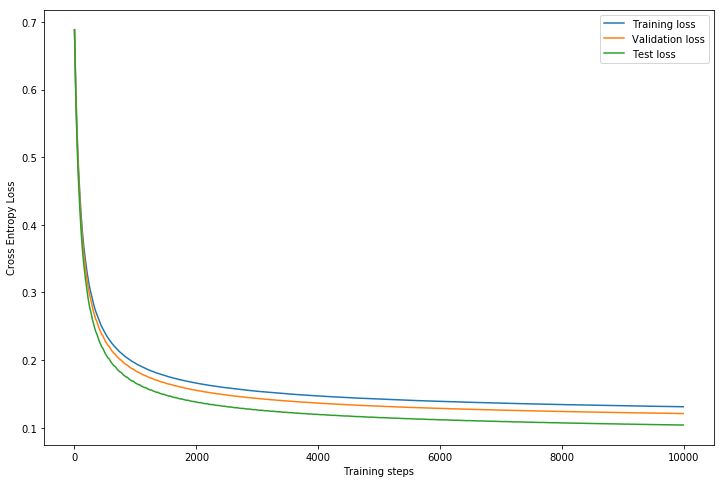

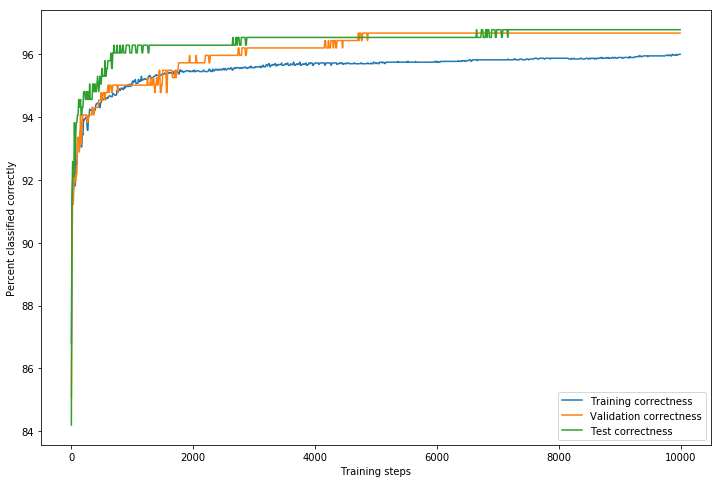

In [869]:
#Training weights
w = training(w, 0)

#Plotting loss
plt.figure(figsize=(12, 8 ))
plt.ylim()
plt.xlabel("Training steps")
plt.ylabel("Cross Entropy Loss")
plt.plot(training_iteration, training_loss, label="Training loss")
plt.plot(training_iteration, validation_loss, label="Validation loss")
plt.plot(training_iteration, test_loss, label="Test loss")
plt.legend() # Shows graph labels

#Plotting percent correctly classified numbers
plt.figure(figsize=(12, 8 ))
plt.ylim()
plt.xlabel("Training steps")
plt.ylabel("Percent classified correctly")
plt.plot(training_iteration, training_corr, label="Training correctness")
plt.plot(training_iteration, validation_corr, label="Validation correctness")
plt.plot(training_iteration, test_corr, label="Test correctness")
plt.legend() # Shows graph labels

#### Discussion
I have chosen to use the first 20000 images for the training set and 2000 for both the training set and validation set. 
This is to make the validation set as equal to the test set as possible, although the difficulty will be different.  

The hyperparameters were chosen rather arbitrarily. By choosing 100 epochs I didn't get any overfitting, but by choosing 200 epochs the early stopping mechanism activated at ~epoch 115. 

I tried a couple different learning rates and annealing learning rate schemes. I found a static learning rate of 0.0001 to give a smooth curve while also getting pretty good results (about 96.5% correctness on the validation set). Choosing an annealing learning rate scheme like $\alpha (t) = \frac{\alpha(0)}{1 + t/T}$ that updates the learning rate each training iteration and an initial learning rate of 0.001 gives a slighly less smooth curve but also a little better results (about 98%). This is expected as a higher learning rate means faster learning, but also a longer step when choosing new weights.

I experimented with a few different values for T and settled for 1000 as this gave a good change in learning rate.

The validation set doesn't seem to be a perfect match, but that is to be expected.

### 2.2 L2 Regularization implementation and plots

First we need to find $\frac{\partial C}{\partial W}$. which simply is $2w_j$. This is already implemented in the code above.

#### Training weights for different values of lambda

In [870]:
#Training weights for lambda = 0.01
clear_stored_vars()
w1 = training(w, lambda_1)
w1_len = w_length
val_1 = validation_corr
tr_1 = training_iteration

#Training weights for lambda = 0.001
clear_stored_vars()
w2 = training(w, lambda_2)
w2_len = w_length
val_2 = validation_corr
tr_2 = training_iteration

#Training weights for lambda = 0.0001
clear_stored_vars()
w3 = training(w, lambda_3)
w3_len = w_length
val_3 = validation_corr
tr_3 = training_iteration


#### Plotting percent classified correctly for different values of lambda

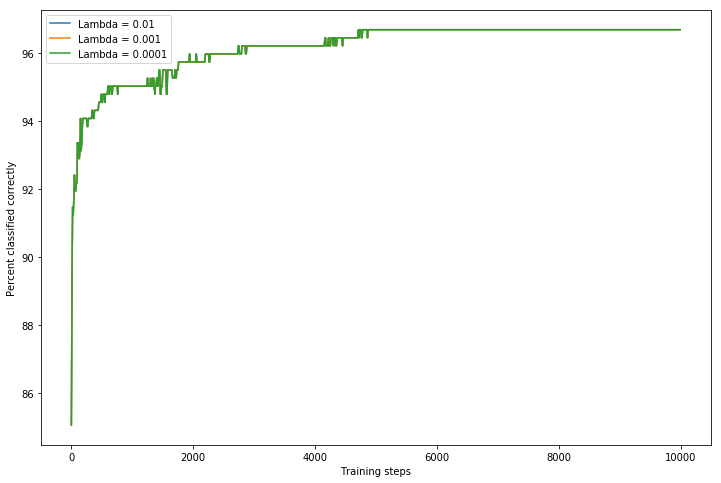

In [871]:
plt.figure(figsize=(12, 8 ))
plt.ylim()
plt.xlabel("Training steps")
plt.ylabel("Percent classified correctly")
plt.plot(tr_1, val_1, label="Lambda = 0.01")
plt.plot(tr_2, val_2, label="Lambda = 0.001")
plt.plot(tr_3, val_3, label="Lambda = 0.0001")

plt.legend() # Shows graph labels

#### Plotting weight lengths for different values of lambda

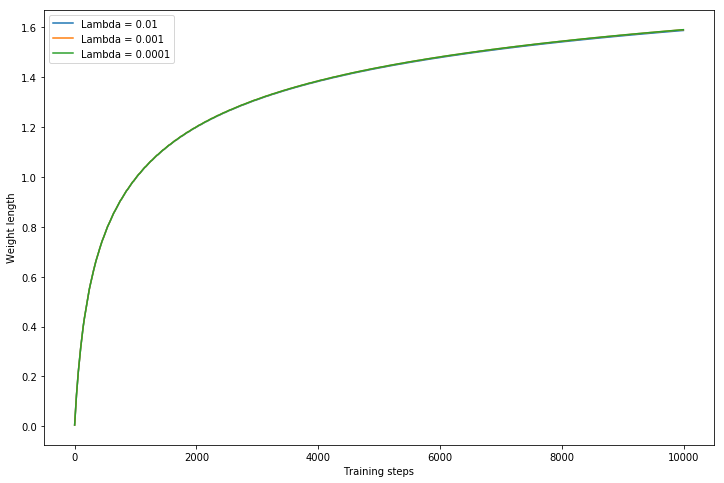

In [872]:
plt.figure(figsize=(12, 8 ))
plt.ylim()
plt.xlabel("Training steps")
plt.ylabel("Weight length")
plt.plot(tr_1, w1_len, label="Lambda = 0.01")
plt.plot(tr_2, w2_len, label="Lambda = 0.001")
plt.plot(tr_3, w3_len, label="Lambda = 0.0001")

plt.legend() # Shows graph labels

#### Plotting weights as images for different values of lambda

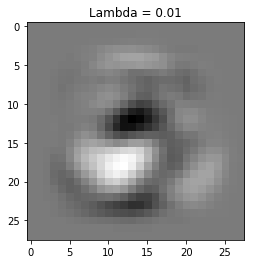

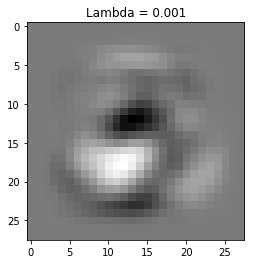

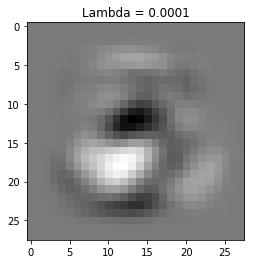

In [873]:
# Plotting weights as an image
plt.figure()
plt.title("Lambda = 0.01")
plt.imshow(np.reshape(w1[:784], (28, 28)), cmap='gray')
plt.figure()
plt.title("Lambda = 0.001")
plt.imshow(np.reshape(w2[:784], (28, 28)), cmap='gray')
plt.figure()
plt.title("Lambda = 0.0001")
plt.imshow(np.reshape(w3[:784], (28, 28)), cmap='gray')

#### Discussion 
When using L2 regularization the early stop mechanism seems to activate sooner. With lambda=0.01 it activates after ~7 epochs. While with lambda=0.0001 it activates after ~100 epochs. When I deactivated the early stop, the images of the weights seem to be almost identical, while the weight lengths seem to differ a bit. Plots for length weights shows that the weights with lambda=0.01 and lambda=0.001 are only slight differ, while for lambda=0.0001 they are little lower. Also when plotting the correctness, the plots for the different lambdas didn't seem to differ much at all.

The images of the weights looks to resemble the number 2, which makes sense since we are trying to classify the number 2. Also we see that the highest intensity is right under the middle. This makes sense since most people tend to draw the number 2 with a little "swirl" which adds a lot of white to that area. Also the middle is the darkest spot. I guess this is because when drawing the number 2, you generally don't come near the middle, but when drawing the number 3, you enter and leave the middle.

It is quite hard to say which lambda works the best. But it may seem that lambda=0.0001 works well as it doesn't trigger the early stop mechanism as early as the other two. Although if I lower the initial learning rate to 0.0001 from 0.001 it isn't triggered, but at the same time the plots become even more similar.

I'm a little suspicious that there might be something wrong with my implementation of the L2 regularization. Unless they are meant to be so similar.

## 3 Softmax Regression through gradient descent

### 3.1 Code and plots for softmax regression through gradient descent

I've opted to use lambda =0.0001 as this was found to be satisfactory in the last task. When testing, it seems to work well here aswell. I also use the same hyper parameters (including initial learning rate, and the same annealing learning rate scheme) and sizes of the sets (the sets will ofcourse be larger here as we are now classyfying all digits).

I've used some of the functions from above, but I'm also reloading the data, clearing the stored variables and writing code for the functions that must be updated to implement softmax regression.

In [886]:
#One hot encoding
def one_hot_encoding(y):
    return np.eye(10)[y]

def inv_one_hot_encoding(m):
    return np.where(m==1)

def mult_correctness(t, y):
    predicted = np.argmax(y, axis=1)
    return 100 * np.sum(predicted == inv_one_hot_encoding(t)) / np.size(predicted)

def softmax(z):
    return (np.exp(z).T / np.sum(np.exp(z), axis = 1)).T

def mult_cross_entropy_loss(t, y, l):
    E = - (t*np.log(y)).mean()
    C = np.sum(np.square(w))
    return E + l * C

def mult_gradient(X, t, y, l): 
    dE = - np.dot(X.T, (t - y))
    dC = 2 * w
    return dE + l * dC

def mult_training(w, l):
    iteration = 0
    for epoch in range(epochs):
        for i in range(batches_per_epoch):
            iteration += 1
            X_batch = X_train[i*batch_size:(i+1)*batch_size]
            Y_batch = Y_train[i*batch_size:(i+1)*batch_size]
            y = softmax(np.dot(X_batch, w))
            w -= learning_rate * mult_gradient(X_batch, Y_batch, y, l)
            if i % check_step == 0:
                training_outputs = softmax(np.dot(X_train, w))
                training_loss.append(mult_cross_entropy_loss(Y_train, training_outputs, l))
                training_corr.append(mult_correctness(Y_train, training_outputs))

                validation_outputs = softmax(np.dot(X_val, w))
                validation_loss.append(mult_cross_entropy_loss(Y_val, validation_outputs, l))
                validation_corr.append(mult_correctness(Y_val, validation_outputs))
                
                test_outputs = softmax(np.dot(X_test, w))
                test_loss.append(mult_cross_entropy_loss(Y_test, test_outputs, l))
                test_corr.append(mult_correctness(Y_test, test_outputs))
                
                training_iteration.append(iteration)
        
        w_storage.append(w)
        validation_loss_per_epoch.append(mult_cross_entropy_loss(Y_val, softmax(np.dot(X_val, w)),l))
        ep_corr = mult_correctness(Y_val, softmax(np.dot(X_val, w)))
        if len(validation_loss_per_epoch) > 3:
            if early_stopping(validation_loss_per_epoch, epoch): 
                print ("Early stopping at epoch {}, because the validation loss has increased the last 3 epoch(s)".format(epoch + 1))
                w = w_storage[np.argmin(validation_loss_per_epoch)]
                print ("Weights has been set at epoch with lowest validation loss")
                return w 
    return w  

In [888]:
reload_data()
clear_stored_vars()
w = np.zeros([X_train.shape[1],10])

#One hot encoding
Y_train = one_hot_encoding(Y_train)
Y_val   = one_hot_encoding(Y_val)
Y_test  = one_hot_encoding(Y_test)

#Training weights
w = mult_training(w, 0.0001)

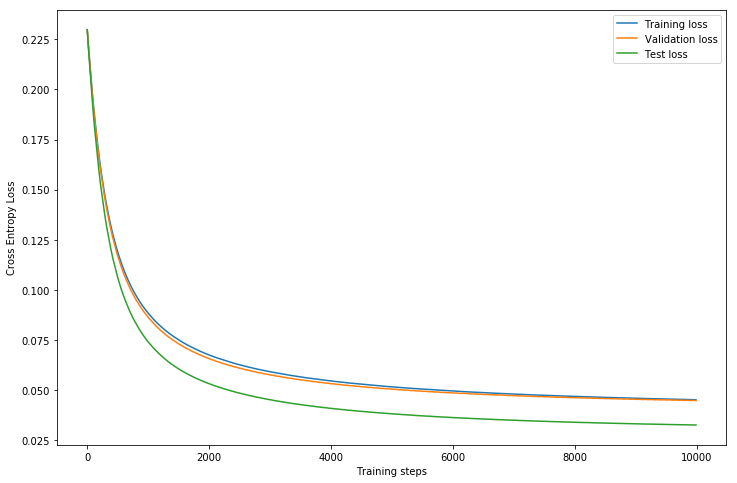

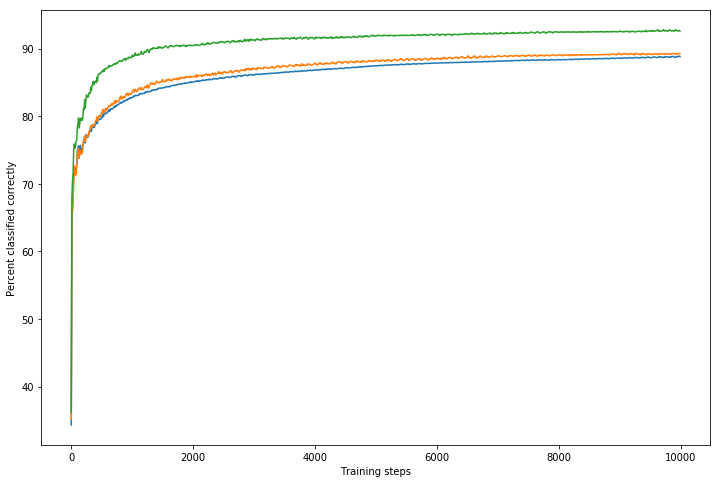

In [889]:
#Plotting loss
plt.figure(figsize=(12, 8 ))
plt.ylim()
plt.xlabel("Training steps")
plt.ylabel("Cross Entropy Loss")
plt.plot(training_iteration, training_loss, label="Training loss")
plt.plot(training_iteration, validation_loss, label="Validation loss")
plt.plot(training_iteration, test_loss, label="Test loss")
plt.legend() # Shows graph labels

#Plotting percent correctly classified numbers
plt.figure(figsize=(12, 8 ))
plt.ylim()
plt.xlabel("Training steps")
plt.ylabel("Percent classified correctly")
plt.plot(training_iteration, training_corr, label="Training correctness")
plt.plot(training_iteration, validation_corr, label="Validation correctness")
plt.plot(training_iteration, test_corr, label="Test correctness")


#### Discussion
The loss- and correctness plots seem to be close to the ones from task 2. But here we get a lower percent digits classified correctly, which is to be expected as we are now trying to classify any digit (not just a 2 or 3).

### 3.2 Creating images of weigths, and averages of imported images, for each digit

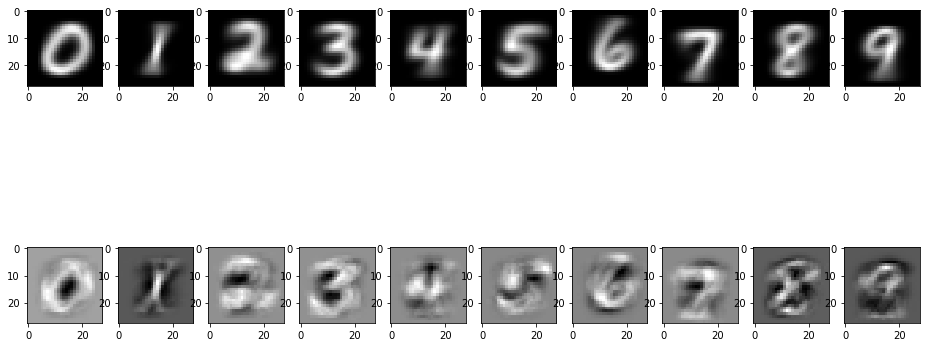

In [890]:
X_train, Y_train, X_test, Y_test = mnist.load()

#Normalizing the sets
X_train = X_train / 255

#Plotting weights as images and averages of each digit as images
fig1 = plt.figure(figsize=(16, 8 ))
for i in range(10):
    fig1.add_subplot(2,10,i+1)
    average_digit = X_train[Y_train == i].mean(axis=0)
    plt.imshow(np.reshape(average_digit, (28, 28)), cmap='gray')
    fig1.add_subplot(2,10,i+11)
    plt.imshow(np.reshape(w[:784, i], (28, 28)), cmap='gray')
plt.show()

#### Discussion
Above are the images of the averages of the imported digits and the images of the weights. The first line are the images of the average of all examples of the imported digits. The second line are the images of the weights for each digit. We can see that the weights have gotten pretty good, and we can easily distinguish the different digits from each other. It may actually be easier to see the number 2 in this task in the last. This is probably because there are more digits to classify, and there are alot more shapes this time, which makes the 2 stand out more than from just being compared to a 3.

## Conclusion

Both the linear regression through gradient descent for binary classifaction and softmax regression through gradient descent for multi-class classification seems to work really well! I have, however a few concerns. Firstly as stated earlier, there wasn't much change when changing the L2 regularization parameter lambda. Also I find it curious that for all of my plots the test set seems to perform the best. 